<a href="https://colab.research.google.com/github/Bryan-Benisti/Data_Analyse_projects/blob/main/Bryan_Benisti_Project_1_Geolocalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bryan Benisti Project 1

# Load Libraries

In [47]:
%%capture
!pip install geopandas
!pip install plotly_express

In [48]:
import pandas as pd
import seaborn as sns
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly_express as px

from tqdm.notebook import tqdm 
tqdm.pandas()

from geopy.distance import great_circle

# Load the data file from my Dropbox (it could have been Google Drive)

In [3]:
path = "https://www.dropbox.com/s/g048q27d9tozspj/users.csv?dl=1"
df = pd.read_csv(path)

In [4]:
df.head(5)

,user,signup,lat,long,reviews
0,816220,2019-01-01 02:07:25,51.4000,-0.20000,0
1,816238,2019-01-01 02:34:02,51.0979,-0.23023,0
2,816318,2019-01-01 06:40:32,52.4239,-0.89036,2
3,816394,2019-01-01 09:23:02,55.8649,-4.28707,4
4,816414,2019-01-01 09:42:51,52.5087,-0.63975,24


In [5]:
display(df)

,user,signup,lat,long,reviews
0,816220,2019-01-01 02:07:25,51.4000,-0.20000,0
1,816238,2019-01-01 02:34:02,51.0979,-0.23023,0
2,816318,2019-01-01 06:40:32,52.4239,-0.89036,2
3,816394,2019-01-01 09:23:02,55.8649,-4.28707,4
4,816414,2019-01-01 09:42:51,52.5087,-0.63975,24
...,...,...,...,...,...
39827,6181166,2022-04-19 19:32:18,51.7527,-2.56776,0
39828,6181253,2022-04-19 19:44:42,52.6254,1.28418,0
39829,6181494,2022-04-19 20:34:05,51.4804,-2.58222,0
39830,6181534,2022-04-19 20:43:31,52.3890,-1.98321,0


# Describe some aspects of the dataset
 (e.g., variables, descriptive statistics)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39832 entries, 0 to 39831
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user     39832 non-null  int64  
 1   signup   39832 non-null  object 
 2   lat      39457 non-null  float64
 3   long     39457 non-null  float64
 4   reviews  39832 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ MB


In [7]:
df['signup'] = pd.to_datetime(df['signup'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39832 entries, 0 to 39831
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user     39832 non-null  int64         
 1   signup   39832 non-null  datetime64[ns]
 2   lat      39457 non-null  float64       
 3   long     39457 non-null  float64       
 4   reviews  39832 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.5 MB


In [9]:
df.describe()

,user,lat,long,reviews
count,3.983200e+04,39457.000000,39457.000000,39832.000000
mean,3.266298e+06,51.017147,-1.653162,17.974719
std,1.584716e+06,8.759680,20.564222,38.944404
min,8.162200e+05,-45.901500,-157.786000,0.000000
25%,2.068432e+06,51.428800,-2.465690,0.000000
50%,2.808378e+06,51.733700,-1.203390,4.000000
75%,4.920015e+06,53.379100,-0.138080,18.000000
max,6.182219e+06,64.141300,179.350000,1273.000000


In [10]:
df.shape

(39832, 5)

# Filter the DataFrame
 so that you will conduct the following analysis on a filtered version of the DataFrame.

In [11]:
df.signup.dt.year.value_counts()

2021    14246
2020    13478
2019     7616
2022     4492
Name: signup, dtype: int64

In [12]:
df_fil = df[df.signup.dt.year >=2020].copy()


In [13]:
df_fil.shape

(32216, 5)

# Do some analysis using “group by”

In [14]:
df_fil.signup.dt.isocalendar().week.value_counts()

1     1160
32    1085
39    1050
2     1010
5      999
3      963
6      954
7      929
52     894
4      788
38     761
40     741
44     732
8      717
14     700
10     673
42     661
9      660
11     653
43     653
46     634
45     620
35     572
53     570
41     567
12     564
47     543
13     535
15     528
33     507
50     506
37     497
29     495
51     485
36     482
25     473
30     468
34     468
31     443
48     435
27     429
49     422
21     417
24     414
16     404
26     393
20     389
19     385
28     385
18     362
23     359
22     356
17     326
Name: week, dtype: Int64

In [15]:
df_fil['year_week'] = df_fil['signup'].dt.year.astype(str) + '-' + df_fil["signup"].dt.isocalendar().week.astype(str).str.zfill(2)


In [16]:
df_fil

,user,signup,lat,long,reviews,year_week
7616,1748170,2020-01-01 01:51:16,53.8328,-3.04710,12,2020-01
7617,1748243,2020-01-01 03:07:17,57.1707,-2.09498,14,2020-01
7618,1748676,2020-01-01 11:49:40,52.2001,0.97865,18,2020-01
7619,1748732,2020-01-01 12:18:54,52.4231,-1.50584,34,2020-01
7620,1748893,2020-01-01 13:45:49,51.3561,-0.09298,50,2020-01
...,...,...,...,...,...,...
39827,6181166,2022-04-19 19:32:18,51.7527,-2.56776,0,2022-16
39828,6181253,2022-04-19 19:44:42,52.6254,1.28418,0,2022-16
39829,6181494,2022-04-19 20:34:05,51.4804,-2.58222,0,2022-16
39830,6181534,2022-04-19 20:43:31,52.3890,-1.98321,0,2022-16


In [17]:
df_fil = df_fil.sort_values(by = "signup")

In [18]:
df_fil

,user,signup,lat,long,reviews,year_week
7616,1748170,2020-01-01 01:51:16,53.8328,-3.04710,12,2020-01
7617,1748243,2020-01-01 03:07:17,57.1707,-2.09498,14,2020-01
7618,1748676,2020-01-01 11:49:40,52.2001,0.97865,18,2020-01
7619,1748732,2020-01-01 12:18:54,52.4231,-1.50584,34,2020-01
7620,1748893,2020-01-01 13:45:49,51.3561,-0.09298,50,2020-01
...,...,...,...,...,...,...
39827,6181166,2022-04-19 19:32:18,51.7527,-2.56776,0,2022-16
39828,6181253,2022-04-19 19:44:42,52.6254,1.28418,0,2022-16
39829,6181494,2022-04-19 20:34:05,51.4804,-2.58222,0,2022-16
39830,6181534,2022-04-19 20:43:31,52.3890,-1.98321,0,2022-16


In [19]:
table = df_fil.groupby("year_week").first().reset_index()
table

,year_week,user,signup,lat,long,reviews
0,2020-01,1748170,2020-01-01 01:51:16,53.8328,-3.04710,12
1,2020-02,1759215,2020-01-06 00:15:56,51.4996,-0.10067,4
2,2020-03,1783830,2020-01-13 00:20:37,53.2799,-1.24765,13
3,2020-04,1813161,2020-01-20 00:47:11,51.6191,-0.29689,3
4,2020-05,1834298,2020-01-27 01:13:13,52.2053,0.12182,2
...,...,...,...,...,...,...
118,2022-13,6079298,2022-03-28 00:21:22,19.4139,-99.04340,1
119,2022-14,6107589,2022-04-04 03:55:45,51.4814,0.29741,5
120,2022-15,6142975,2022-04-11 02:24:49,51.5651,0.67139,1
121,2022-16,6172846,2022-04-18 02:18:08,53.8236,-1.58015,0


In [20]:
df_fil["year"] = df_fil.year_week.apply(lambda x: x[0:4]).astype('int')
df_fil

,user,signup,lat,long,reviews,year_week,year
7616,1748170,2020-01-01 01:51:16,53.8328,-3.04710,12,2020-01,2020
7617,1748243,2020-01-01 03:07:17,57.1707,-2.09498,14,2020-01,2020
7618,1748676,2020-01-01 11:49:40,52.2001,0.97865,18,2020-01,2020
7619,1748732,2020-01-01 12:18:54,52.4231,-1.50584,34,2020-01,2020
7620,1748893,2020-01-01 13:45:49,51.3561,-0.09298,50,2020-01,2020
...,...,...,...,...,...,...,...
39827,6181166,2022-04-19 19:32:18,51.7527,-2.56776,0,2022-16,2022
39828,6181253,2022-04-19 19:44:42,52.6254,1.28418,0,2022-16,2022
39829,6181494,2022-04-19 20:34:05,51.4804,-2.58222,0,2022-16,2022
39830,6181534,2022-04-19 20:43:31,52.3890,-1.98321,0,2022-16,2022


In [21]:
df_fil["hour"] = df_fil.signup.dt.hour
df_fil

,user,signup,lat,long,reviews,year_week,year,hour
7616,1748170,2020-01-01 01:51:16,53.8328,-3.04710,12,2020-01,2020,1
7617,1748243,2020-01-01 03:07:17,57.1707,-2.09498,14,2020-01,2020,3
7618,1748676,2020-01-01 11:49:40,52.2001,0.97865,18,2020-01,2020,11
7619,1748732,2020-01-01 12:18:54,52.4231,-1.50584,34,2020-01,2020,12
7620,1748893,2020-01-01 13:45:49,51.3561,-0.09298,50,2020-01,2020,13
...,...,...,...,...,...,...,...,...
39827,6181166,2022-04-19 19:32:18,51.7527,-2.56776,0,2022-16,2022,19
39828,6181253,2022-04-19 19:44:42,52.6254,1.28418,0,2022-16,2022,19
39829,6181494,2022-04-19 20:34:05,51.4804,-2.58222,0,2022-16,2022,20
39830,6181534,2022-04-19 20:43:31,52.3890,-1.98321,0,2022-16,2022,20


# Create a pivot table 

In [22]:
pivot_table = pd.pivot_table(df_fil, 
                       values='reviews',
                       index='hour', 
                       columns='year',
                       aggfunc='mean')


In [23]:
pivot_table

year,2020,2021,2022
hour,,,
0,20.595960,13.179054,5.518182
1,22.414201,14.704301,8.611940
2,25.882979,12.453901,1.522727
3,20.771739,10.330357,7.173077
4,18.852459,10.395604,5.142857
5,21.203704,11.450980,7.509804
6,22.204969,11.227891,3.945946
7,27.875256,10.960986,3.621212
8,23.771252,13.150820,4.535032


<Axes: xlabel='hour', ylabel='2020'>

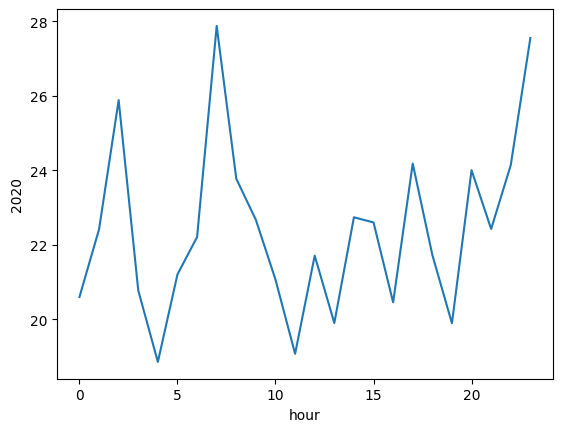

In [24]:
sns.lineplot(data = pivot_table, x = 'hour', y = 2020)

<Axes: xlabel='hour', ylabel='2020'>

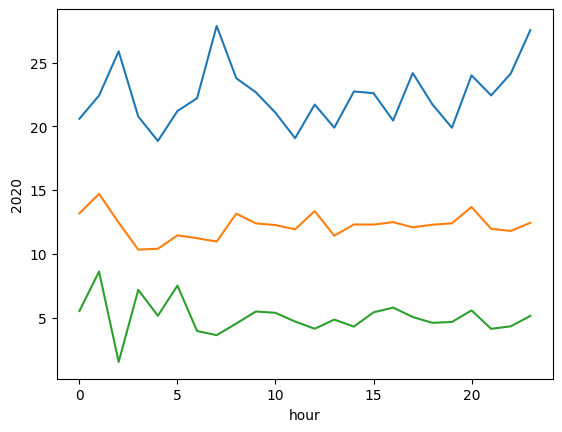

In [25]:
sns.lineplot(data = pivot_table, x = 'hour', y = 2020)
sns.lineplot(data = pivot_table, x = 'hour', y = 2021)
sns.lineplot(data = pivot_table, x = 'hour', y = 2022)


# Run a linear regression.

In [26]:
test_df = df_fil.sample(1)
test_df

,user,signup,lat,long,reviews,year_week,year,hour
37258,5832532,2022-02-07 13:19:45,53.3565,-1.46995,0,2022-06,2022,13


In [27]:
px.scatter_mapbox(test_df, lat="lat", lon="long", zoom=15, mapbox_style="open-street-map")

In [28]:
test_df["geom"] = test_df["lat"].map(str) + ',' + test_df["long"].map(str)
locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)
tqdm.pandas()
test_df["address"] = test_df["geom"].progress_apply(rgeocode)
test_df.head()

  0%|          | 0/1 [00:00<?, ?it/s]

,user,signup,lat,long,reviews,year_week,year,hour,geom,address
37258,5832532,2022-02-07 13:19:45,53.3565,-1.46995,0,2022-06,2022,13,"53.3565,-1.46995","(165,167,169,171,173,175,177,179, Albert Road,..."


In [31]:
test_df = df_fil.sample(100).copy()
test_df = test_df.dropna(subset=['lat', 'long'])
test_df

,user,signup,lat,long,reviews,year_week,year,hour,geom
32166,5165404,2021-09-27 10:08:50,51.2560,-0.55115,7,2021-39,2021,10,"51.256,-0.55115"
34183,5423937,2021-11-28 14:33:51,51.6158,0.11652,2,2021-47,2021,14,"51.6158,0.11652"
12385,2351093,2020-07-21 16:39:11,52.8923,-1.43133,3,2020-30,2020,16,"52.8923,-1.43133"
13262,2430218,2020-08-07 18:16:56,51.4543,0.20713,31,2020-32,2020,18,"51.4543,0.20713"
37841,5909750,2022-02-20 03:49:12,-34.9031,-57.91990,1,2022-07,2022,3,"-34.9031,-57.9199"
...,...,...,...,...,...,...,...,...,...
15177,2579866,2020-09-21 09:04:18,51.8716,-1.12556,7,2020-39,2020,9,"51.8716,-1.12556"
33062,5280304,2021-10-27 13:50:00,53.7160,-1.32284,15,2021-43,2021,13,"53.716,-1.32284"
31588,5104094,2021-09-09 09:32:01,51.5970,-0.15425,0,2021-36,2021,9,"51.597,-0.15425"
33420,5327577,2021-11-06 08:04:56,52.0666,-1.37080,6,2021-44,2021,8,"52.0666,-1.3708"


In [32]:
test_df["geom"] = test_df["lat"].map(str) + ',' + test_df["long"].map(str)
locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)
tqdm.pandas()
test_df["address"] = test_df["geom"].progress_apply(rgeocode)
test_df.head()

  0%|          | 0/98 [00:00<?, ?it/s]

,user,signup,lat,long,reviews,year_week,year,hour,geom,address
32166,5165404,2021-09-27 10:08:50,51.2560,-0.55115,7,2021-39,2021,10,"51.256,-0.55115","(Colburn Crescent, Slyfield, Jacobs Well, Guil..."
34183,5423937,2021-11-28 14:33:51,51.6158,0.11652,2,2021-47,2021,14,"51.6158,0.11652","(Brocket Way, Hainault, London Borough of Redb..."
12385,2351093,2020-07-21 16:39:11,52.8923,-1.43133,3,2020-30,2020,16,"52.8923,-1.43133","(Rosedale Avenue, Boulton, Derby, England, DE2..."
13262,2430218,2020-08-07 18:16:56,51.4543,0.20713,31,2020-32,2020,18,"51.4543,0.20713","(Alan Close, Temple Hill, Dartford, Kent, Engl..."
37841,5909750,2022-02-20 03:49:12,-34.9031,-57.91990,1,2022-07,2022,3,"-34.9031,-57.9199","(Calle 128, Barrio Universitario, Berisso, Par..."


In [33]:
x = test_df.iloc[0]["address"]
x

Location(Colburn Crescent, Slyfield, Jacobs Well, Guildford, Surrey, England, GU4 7YZ, United Kingdom, (51.255751959450336, -0.5514132446563049, 0.0))

In [34]:
x.raw["address"]

{'road': 'Colburn Crescent',
 'suburb': 'Slyfield',
 'village': 'Jacobs Well',
 'town': 'Guildford',
 'county': 'Surrey',
 'ISO3166-2-lvl6': 'GB-SRY',
 'state': 'England',
 'ISO3166-2-lvl4': 'GB-ENG',
 'postcode': 'GU4 7YZ',
 'country': 'United Kingdom',
 'country_code': 'gb'}

In [35]:
x.raw["address"]["country"]

'United Kingdom'

In [36]:
test_df["country"] = test_df["address"].apply(lambda x: x.raw["address"]["country"])

In [37]:
test_df

,user,signup,lat,long,reviews,year_week,year,hour,geom,address,country
32166,5165404,2021-09-27 10:08:50,51.2560,-0.55115,7,2021-39,2021,10,"51.256,-0.55115","(Colburn Crescent, Slyfield, Jacobs Well, Guil...",United Kingdom
34183,5423937,2021-11-28 14:33:51,51.6158,0.11652,2,2021-47,2021,14,"51.6158,0.11652","(Brocket Way, Hainault, London Borough of Redb...",United Kingdom
12385,2351093,2020-07-21 16:39:11,52.8923,-1.43133,3,2020-30,2020,16,"52.8923,-1.43133","(Rosedale Avenue, Boulton, Derby, England, DE2...",United Kingdom
13262,2430218,2020-08-07 18:16:56,51.4543,0.20713,31,2020-32,2020,18,"51.4543,0.20713","(Alan Close, Temple Hill, Dartford, Kent, Engl...",United Kingdom
37841,5909750,2022-02-20 03:49:12,-34.9031,-57.91990,1,2022-07,2022,3,"-34.9031,-57.9199","(Calle 128, Barrio Universitario, Berisso, Par...",Argentina
...,...,...,...,...,...,...,...,...,...,...,...
15177,2579866,2020-09-21 09:04:18,51.8716,-1.12556,7,2020-39,2020,9,"51.8716,-1.12556","(Willow Road, Ambrosden, Cherwell, Oxfordshire...",United Kingdom
33062,5280304,2021-10-27 13:50:00,53.7160,-1.32284,15,2021-43,2021,13,"53.716,-1.32284","(Holywell Avenue, Glasshoughton, Pontefract, W...",United Kingdom
31588,5104094,2021-09-09 09:32:01,51.5970,-0.15425,0,2021-36,2021,9,"51.597,-0.15425","(Coldfall Primary School, Coldfall Avenue, For...",United Kingdom
33420,5327577,2021-11-06 08:04:56,52.0666,-1.37080,6,2021-44,2021,8,"52.0666,-1.3708","(Fivash Close, Banbury Rise, Banbury, North Ne...",United Kingdom


In [38]:
test_df.country.value_counts()

United Kingdom    92
Éire / Ireland     2
Singapore          2
Argentina          1
Sverige            1
Name: country, dtype: int64

In [39]:
result = smf.ols(formula = "reviews ~ hour" , data = test_df).fit()

In [40]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.605
Date:                Wed, 03 May 2023   Prob (F-statistic):              0.208
Time:                        09:36:22   Log-Likelihood:                -446.34
No. Observations:                  98   AIC:                             896.7
Df Residuals:                      96   BIC:                             901.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3809      6.605      3.086      0.0

In [41]:
result = smf.ols(formula = "reviews ~ hour + C(country)" , data = test_df).fit()

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     13.72
Date:                Wed, 03 May 2023   Prob (F-statistic):           5.25e-10
Time:                        09:36:30   Log-Likelihood:                -419.84
No. Observations:                  98   AIC:                             851.7
Df Residuals:                      92   BIC:                             867.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [43]:
result = smf.ols(formula = "reviews ~ C(country)" , data = test_df).fit()

In [44]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                reviews   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     17.30
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.21e-10
Time:                        09:36:56   Log-Likelihood:                -419.89
No. Observations:                  98   AIC:                             849.8
Df Residuals:                      93   BIC:                             862.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [45]:
result.params

Intercept                         1.000000
C(country)[T.Singapore]          86.500000
C(country)[T.Sverige]           113.000000
C(country)[T.United Kingdom]      8.782609
C(country)[T.Éire / Ireland]     19.500000
dtype: float64